In [43]:
import pandas as pd

df = pd.read_excel("Stock Price Data.xlsx")
print(df.shape)
df.head()

(10060, 10)


,Stock,Date,Close/Last,Volume,Open,High,Low,7 Day MA,14 Day MA,1 Month MA
0,AAPL,2025-07-11,211.16,39765810,210.57,212.13,209.86,211.522857,207.077857,203.883333
1,AAPL,2025-07-10,212.41,44443640,210.51,213.48,210.03,211.045714,206.352143,203.444583
2,AAPL,2025-07-09,211.14,48749370,209.53,211.33,207.22,210.011429,205.221429,203.045000
3,AAPL,2025-07-08,210.01,42848930,210.10,211.43,208.45,208.574286,204.114286,202.717083
4,AAPL,2025-07-07,209.95,50228980,212.68,216.23,208.80,207.287143,203.286429,202.370833


In [44]:
print("Column names:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())

Column names: ['Stock', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low', '7 Day MA', '14 Day MA', '1 Month MA']

Data types:
Stock                 object
Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
7 Day MA             float64
14 Day MA            float64
1 Month MA           float64
dtype: object

Missing values per column:
Stock         0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
7 Day MA      0
14 Day MA     0
1 Month MA    0
dtype: int64


In [45]:
print("\nSample data:")
display(df.head())


Sample data:


,Stock,Date,Close/Last,Volume,Open,High,Low,7 Day MA,14 Day MA,1 Month MA
0,AAPL,2025-07-11,211.16,39765810,210.57,212.13,209.86,211.522857,207.077857,203.883333
1,AAPL,2025-07-10,212.41,44443640,210.51,213.48,210.03,211.045714,206.352143,203.444583
2,AAPL,2025-07-09,211.14,48749370,209.53,211.33,207.22,210.011429,205.221429,203.045000
3,AAPL,2025-07-08,210.01,42848930,210.10,211.43,208.45,208.574286,204.114286,202.717083
4,AAPL,2025-07-07,209.95,50228980,212.68,216.23,208.80,207.287143,203.286429,202.370833


In [46]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print("\nDate conversion - null dates:", df['Date'].isna().sum())




Date conversion - null dates: 0


In [47]:
price_cols = ['Close/Last', 'Open', 'High', 'Low']

for col in price_cols:
    df[col] = df[col].astype(str).str.replace(',', '').str.replace('$', '').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nAfter cleaning price columns:")
print(df[price_cols].head())

for col in price_cols:
    print(f"{col} - missing after conversion:", df[col].isna().sum())


After cleaning price columns:
   Close/Last    Open    High     Low
0      211.16  210.57  212.13  209.86
1      212.41  210.51  213.48  210.03
2      211.14  209.53  211.33  207.22
3      210.01  210.10  211.43  208.45
4      209.95  212.68  216.23  208.80
Close/Last - missing after conversion: 0
Open - missing after conversion: 0
High - missing after conversion: 0
Low - missing after conversion: 0


In [48]:
df['Year'] = df['Date'].dt.year
print(df['Year'].head())

0    2025
1    2025
2    2025
3    2025
4    2025
Name: Year, dtype: int32


In [49]:
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


,Date,Close/Last,Volume,Open,High,Low,7 Day MA,14 Day MA,1 Month MA,Year
count,10060,10060.000000,1.006000e+04,10060.000000,10060.000000,10060.000000,10060.000000,10060.000000,10060.000000,10060.000000
mean,2020-07-08 07:40:20.516898560,138.939068,8.161268e+07,138.906327,140.764714,136.989527,138.604928,138.216780,137.665327,2020.016700
min,2015-07-13 00:00:00,9.580000,7.164543e+06,9.490000,10.330000,9.400000,10.087143,10.786429,11.525417,2015.000000
25%,2018-01-08 00:00:00,46.887500,3.791698e+07,46.810000,47.287500,46.440000,46.820714,46.466786,46.217604,2018.000000
50%,2020-07-09 00:00:00,120.655000,6.719858e+07,120.500000,122.145000,118.935000,119.806429,118.942857,118.900000,2020.000000
75%,2023-01-06 00:00:00,201.397500,1.044772e+08,200.755000,204.335000,198.270000,201.441429,201.313214,200.506146,2023.000000
max,2025-07-11 00:00:00,503.510000,9.140809e+08,503.050000,506.780000,499.740000,498.940000,495.986429,487.463750,2025.000000
std,NaN,106.761561,6.314621e+07,106.756626,108.193914,105.254075,106.489375,106.187534,105.756593,2.914379


In [50]:
print("\nUnique stocks:", df['Stock'].unique())
print("Date range:", df['Date'].min(), "to", df['Date'].max())


Unique stocks: ['AAPL' 'TSLA' 'MSFT' 'AMZN']
Date range: 2015-07-13 00:00:00 to 2025-07-11 00:00:00


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style('whitegrid')
%matplotlib inline

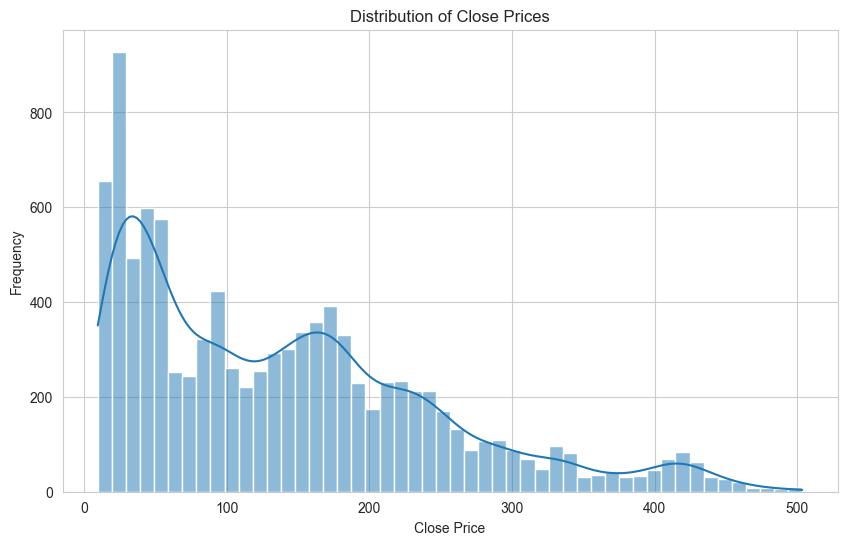

In [52]:
plt.figure(figsize=(10,6))
sns.histplot(df['Close/Last'].dropna(), bins=50, kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

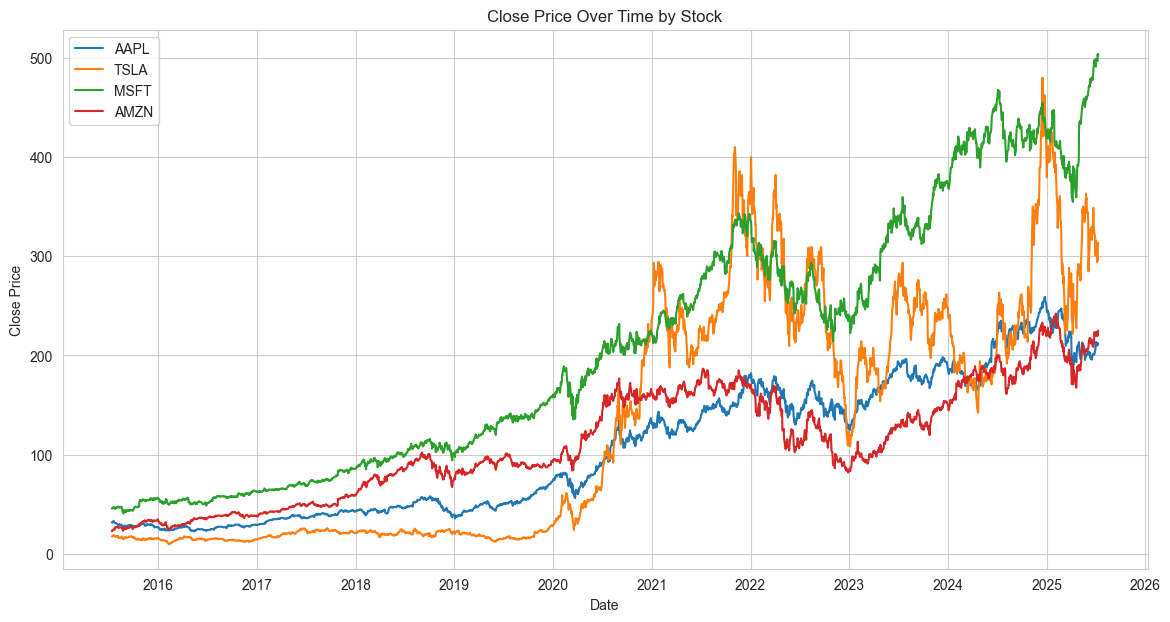

In [53]:
plt.figure(figsize=(14,7))
for stock in df['Stock'].unique():
    stock_data = df[df['Stock'] == stock]
    plt.plot(stock_data['Date'], stock_data['Close/Last'], label=stock)

plt.title('Close Price Over Time by Stock')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

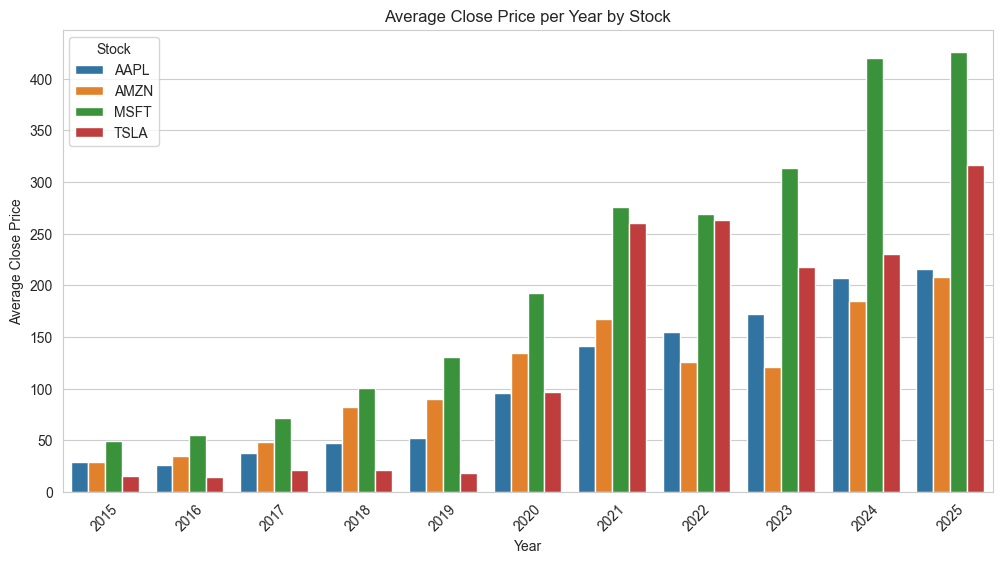

In [54]:
avg_year_stock = df.groupby(['Year', 'Stock'])['Close/Last'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=avg_year_stock, x='Year', y='Close/Last', hue='Stock')
plt.title('Average Close Price per Year by Stock')
plt.xticks(rotation=45)
plt.ylabel('Average Close Price')
plt.show()

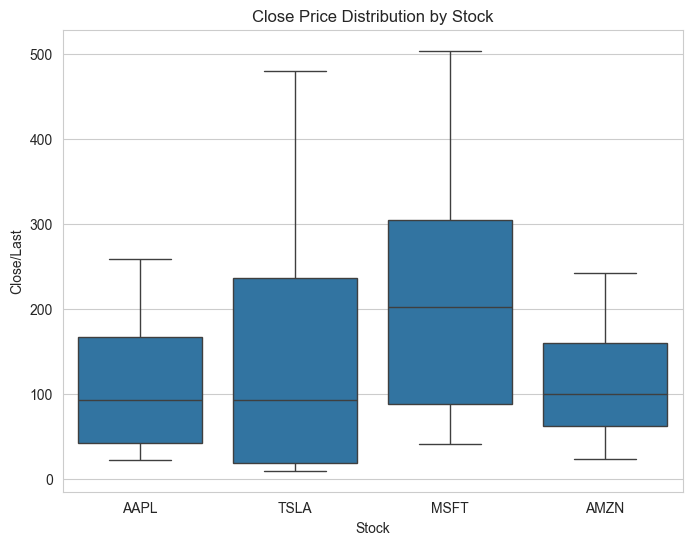

In [55]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Stock', y='Close/Last', data=df)
plt.title('Close Price Distribution by Stock')
plt.show()

## IMPORTS & SETUP

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet  # install via: pip install prophet
import warnings
warnings.filterwarnings("ignore")

# Plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

## LOAD DATA

In [57]:
df = pd.read_excel("Stock Price Data.xlsx")

# Ensure correct data types
df['Date'] = pd.to_datetime(df['Date'])
price_cols = ['Close/Last', 'Open', 'High', 'Low']
for col in price_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Data shape:", df.shape)
print("Stocks in dataset:", df['Stock'].unique())
print("Date range:", df['Date'].min(), "to", df['Date'].max())

Data shape: (10060, 10)
Stocks in dataset: ['AAPL' 'TSLA' 'MSFT' 'AMZN']
Date range: 2015-07-13 00:00:00 to 2025-07-11 00:00:00


## FORECASTING FUNCTION

In [58]:
def forecast_stock(stock_name, df, years_ahead=5):
    """
    Forecasts stock price using Prophet up to a specified number of years ahead.
    """
    print(f"\n=== Forecasting {stock_name} ===")
    
    # Filter stock data
    stock_df = df[df['Stock'] == stock_name][['Date', 'Close/Last']].rename(
        columns={'Date': 'ds', 'Close/Last': 'y'}
    )
    
    # Create and fit Prophet model
    m = Prophet(daily_seasonality=True)
    m.fit(stock_df)
    
    # Create future dataframe up to desired year
    future = m.make_future_dataframe(periods=252*years_ahead)  # 252 trading days per year
    
    # Forecast
    forecast = m.predict(future)
    
    # Plot results
    fig = m.plot(forecast)
    plt.title(f"{stock_name} Forecast until {stock_df['ds'].max().year + years_ahead}")
    plt.xlabel("Date")
    plt.ylabel("Close Price ($)")
    plt.show()
    
    # Also return forecast dataframe
    return forecast

## FORECAST ALL STOCKS TO 2030


=== Forecasting AAPL ===


16:14:46 - cmdstanpy - INFO - Chain [1] start processing
16:14:47 - cmdstanpy - INFO - Chain [1] done processing


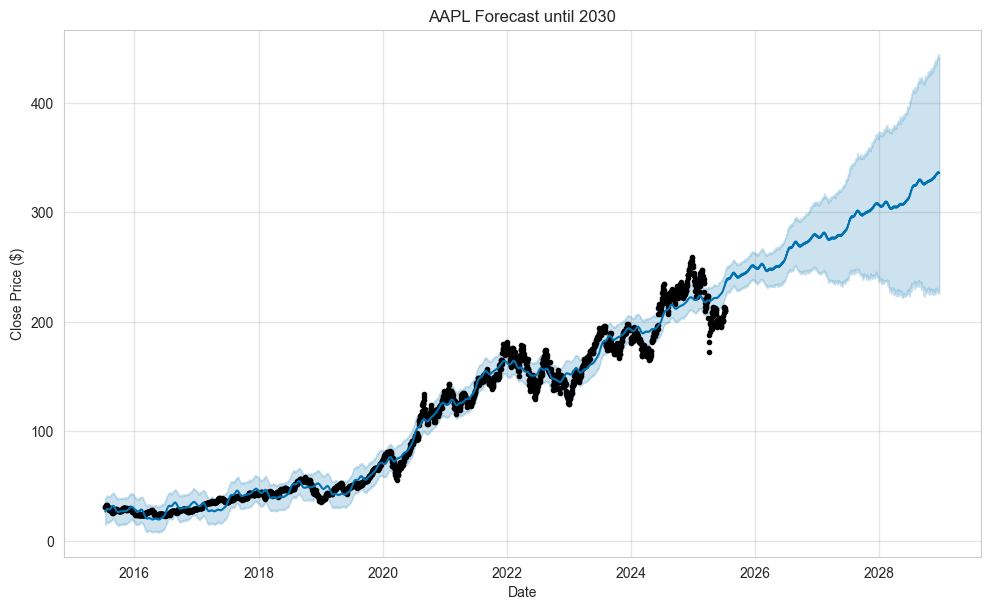

16:14:48 - cmdstanpy - INFO - Chain [1] start processing



=== Forecasting TSLA ===


16:14:48 - cmdstanpy - INFO - Chain [1] done processing


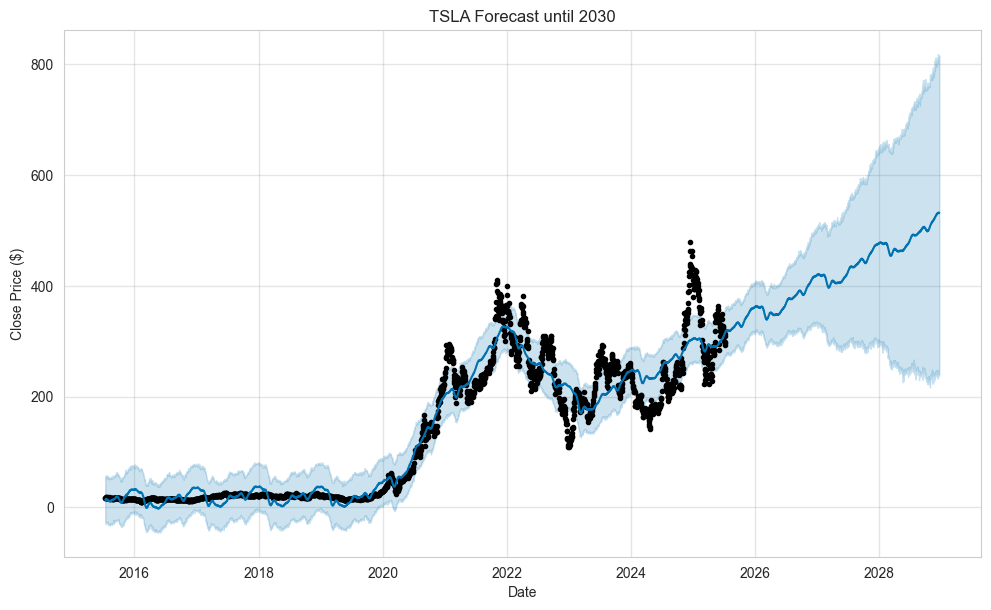

16:14:49 - cmdstanpy - INFO - Chain [1] start processing



=== Forecasting MSFT ===


16:14:50 - cmdstanpy - INFO - Chain [1] done processing


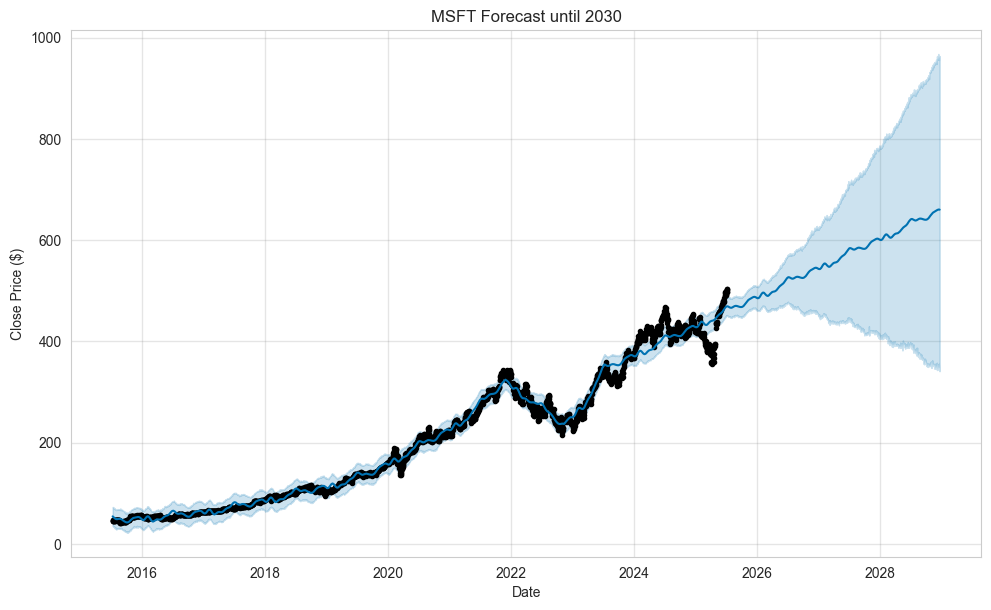

16:14:51 - cmdstanpy - INFO - Chain [1] start processing



=== Forecasting AMZN ===


16:14:52 - cmdstanpy - INFO - Chain [1] done processing


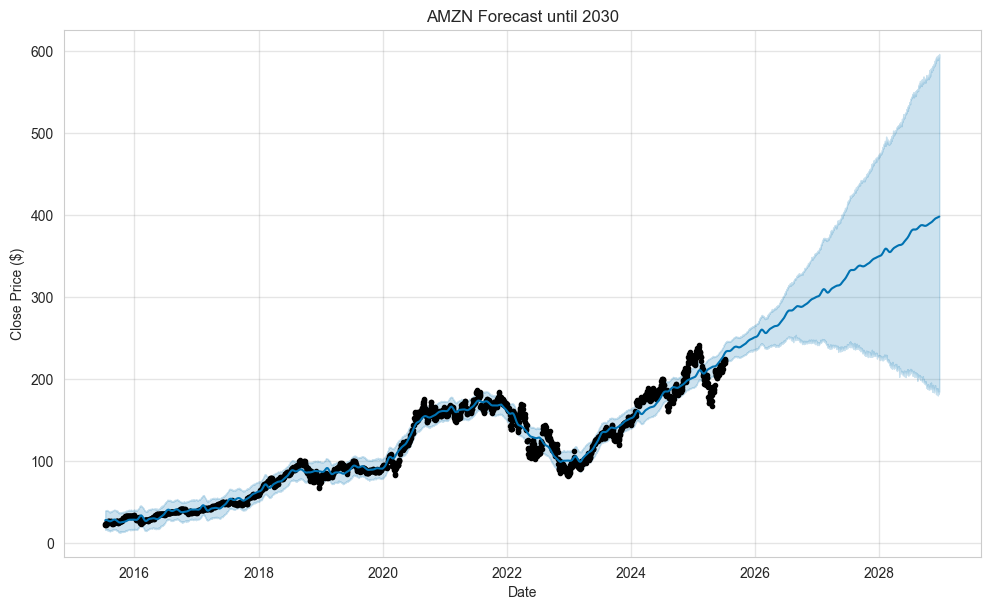

In [59]:
years_to_forecast = 2030 - df['Date'].max().year

all_forecasts = {}
for stock in df['Stock'].unique():
    all_forecasts[stock] = forecast_stock(stock, df, years_ahead=years_to_forecast)

## SAVE FORECAST RESULTS

In [60]:
# Combine all forecasts into a single CSV for documentation
forecast_results = []
for stock, forecast in all_forecasts.items():
    f = forecast.copy()
    f['Stock'] = stock
    forecast_results.append(f)

forecast_df = pd.concat(forecast_results)
forecast_df.to_csv("stock_forecasts_to_2030.csv", index=False)

print("\n✅ All forecasts complete! Results saved as stock_forecasts_to_2030.csv")


✅ All forecasts complete! Results saved as stock_forecasts_to_2030.csv
